# OVERALL : Do not delete the code and comment cells provided.
# Execute the given code cells.
# Answer as prompted

# QUESTION-1 (15 pts) has parts a,b,c. Most are filled. Fill the rest and answer. It is on a "mod DFA" design

## 1a : 9% -- fill details of the construction
## 1b : 3% -- spot-checking the construction
## 1c : 3% -- explaining a construction in a few bullets

# QUESTION-2 (25 PTS) is on designing a DFA and testing it

## 2a : 18% -- finish DFA design
## 2b:    2% -- apply min_dfa_brz
## 2c:    5% -- run a bunch of tests and see how many tests pass

# QUESTION-3 (35 PTS) is on checking whether a given NFA agrees with the DFA in Question-2

## 3a : 10% -- Doing N minus D
## 3b:  10% -- Doing D minus N
## 3c:  10% -- Telling which of the subtractions is empty and why
## 3d:    5% -- Express the non-empty difference as a language in Jove markdown


# QUESTION-4 (25 PTS) is on doing the NFA to DFA conversion

## 4a :   5% -- Explaining how subset construction will go 
## 4b:  10% -- Obtaining the DFA
## 4c:  10% -- Verifying your work
 

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef import *
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4894, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 4894 (delta 154), reused 168 (delta 70), pack-reused 4634
Receiving objects: 100% (4894/4894), 7.57 MiB | 20.18 MiB/s, done.
Resolving deltas: 100% (3159/3159), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mk

# =================== QUESTION DIVIDING LINE ===================

# (15%) : Question 1

# Question 1a (9%): Design a "mod N DFA" (MSB first) for N = 7

<font size="4">

* A "mod N" DFA (MSB first) can be designed as explained in class on Wed 9/22/21 during the MT-1 review session
* The machine receives MSB first
* If the number (modulus) seen thus far is A, and a bit b arrives, the state attained by the machine is 2A+b mod 7   
* Some of the steps are already done for you below. 
* YOUR TASK-1 IS TO FILL THE REMAINING STEPS SHOWN AS ??? AND ALSO WRITE COMMENTS SIMILAR TO THE FILLED ONES
* YOUR TASK-2 is TO SPOT-CHECK by using the "run_dfa" command - conveniently provided for you below
    - Answer near the '==> ... <==' that you will see below
    - 110110  which encodes (in binary) the number 54 ends up in state 54(decimal) mod 7 which is S5
    - 01101111  which encodes (in binary) the number 96+15 = 111 ends up in state 111(decimal) mod 7 which is S6

### Further steps must be carried out as noted below
</font>

In [68]:
mod7DFA = md2mc('''DFA

!! mod7 machine has six states : IF (which is like "state 0"), S1, S2, S3, S4, S5 and S6
!! This is because the remainder after division is a number in the range 0 through 6

IF : 0 -> IF  !! Having see epsilon or a bunch of 0's, the number is 0 (decimal) and mod 7 gives 0 : so IF
IF : 1 -> S1  !! 1 mod 7 is 1, thus goto state S1

S1 : 1 -> S3  !! A=1 : --1--> (i.e. 1 arrives) and so, the new A is 3, and 3 mod 7 is 3. Thus go to state S3
S1 : 0 -> S2  !! A=1 : --0--> new A is "2", hence go to S2

S3 : 1 -> IF  !! A=3 : --1--> new A is 2*3 + 1 which is 7, and 7 mod 7 is 0  - hence go to IF
S3 : 0 -> S6 !! A=3 : --0--> new A is (2*3+0) which is 6, 6 mod 7 is 6 - hence go to S6

S2 : 1 -> S5 !! A=2 : --1--> new A is (2*2+1) mod 7, which is 4. Hence go to S5.
S2 : 0 -> S4  !! A=2 : --0--> new A is (2*2+0) mod 7, which is 4. Hence go to S4.

S4 : 1 -> S2  !! A=4 : --1--> new A is (2*4+1) mod 7, which is 2. Hence go to S2
S4 : 0 -> S1  !! A=4 : --0--> new A is (2*4+0) mod 7, which is 8. Hence go to S1

S5 : 1 -> S4  !! A=5, on 1 new A is (2*5+1) mod 7, giving 11. Hence go to S4
S5 : 0 -> S3  !! A=5, on 0 new A is (2*5+0) mod 7, giving 10. Hence go to S3

S6 : 1 -> S6  !! A=6, on 1 new A is (2*6+1) mod 7, giving 13. Hence go to S6
S6 : 0 -> S5  !! A=6, on 0 new A is (2*6+0) mod 7, giving 12. Hence go to S5
''')

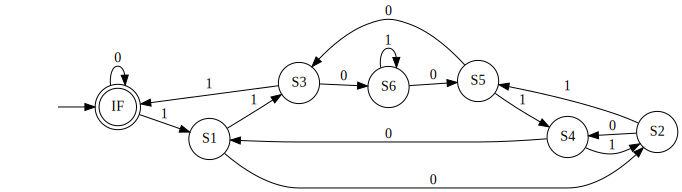

In [69]:
dotObj_dfa(mod7DFA)

# Question 1b (3%): Spot-checks  

## Spot-check 110110 by running the command below

In [70]:
run_dfa(mod7DFA, "110110")

'S5'

### ==> My machine indeed went to state S5 as required <==

## Spot-check 01101111 by running the command below

In [71]:
run_dfa(mod7DFA, "01101111")

'S6'

### ==> My machine indeed went to state S6 as required <==

# Question 1c (3%): Shortcut for the "mod 4" machine

<font size="4">

* Someone implemented a "mod 4" DFA as follows. Explain in neat bulleted steps why this design works
    
</font>

In [51]:
# Design a "mod 4" DFA in a nifty way -- why does it work?

nfa_end_00 = re2nfa("(0+1)* (00)")

Generating LALR tables


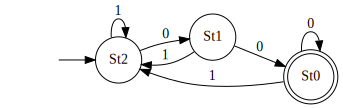

In [52]:
dotObj_dfa(min_dfa(nfa2dfa(nfa_end_00)))

## ==> Why does the above mod-4 machine construction work? <==

<font size="4">
    
    * REASON: The first thing it does is it compresses the total number of states to 3 by taking essentially equivalent states and making them the same.  
    * If the value of the calculation 2*A+b is 0 or 4, being modded by 4 will result in 0 which is what we want, so S0 and S4 are both final states.
    * For S1 and S3, the states where A is either 1 or 3, getting a 1 keeps us in one of those states, and getting a 0 always takes us to S2, so if we merge these states we can simplify the DFA so that a 1 keeps us in this state and a 0 takes us to S2.
    * For S2, the last one to account for, a 1 puts us at 5 mod 4 which means we return to the other compressed fail-state. A 0 gives 4 mod 4, which takes us to the final state.  This means that, ordinarily we might represent this with 4 or 5 states, the expression used cleverly represents it with 3 states.
    
    * REASON: The only way we can end up with A mod 4 = 0 is if the string of bits entered ends with two 0's.
    * The basic idea is a 1 in this string will always bring us as far away from A mod 4 = 0 as possible. To get closer we need a 0 in order to get to S2. At S2 we need a 0 to get to A mod 4 = 0, a 1 will take us away again.
    * This means that regardless of what comes before, in order to gaurantee a satisfactory result of A % 4 = 0, we need a 0 and then a 0 to either get to A % 4 = 0 or to stay there.  Any other sequence as the last 2 bits will render that sequence as invalid, regardless of what came before them.
</font>    

# =================== QUESTION DIVIDING LINE ===================

# (25%) Question 2: Demonstrate your ability to design a DFA

<font size="4">

*
* Design a DFA called dfa01n01 for the set of strings over {0,1} that 
  - Begin with 01, and 
  - do not end with in 01


### Requirements:

* **This DFA must be designed directly** -- i.e. not by designing other DFA or NFA and combining or transforming them
* The DFA must start with state I
* You must maintain states such as SX, SXY, FXY for X and Y in {0,1} (not all cases may be necessary). These states must help the DFA "remember" what it has seen thus far
* The DFA must transition to the state BH if the string so far cannot be recovered from (by adding more symbols). Further BH must transition back to itself upon 0 and 1

### Further steps must be carried out as noted below
</font>

# Question 2a (18%): Provide the design of dfa01n01 below, with comments  

## Provide a sufficient number of comments to help me judge that you understand the design. In particular, show when an "F" state is entered and when a "non-F" state is entered

In [66]:
# Given DFA

dfa01n01 = md2mc(
'''DFA

I : 0 -> S0  !!The string entered must begin with the characters '01', so if the first character is 0, we can advance to further determine if the string is accepted.
I : 1 -> BH  !!Continuing off of the above comment, because the first character in the string is 1, it cannot begin with '01', which means the string is lost, no amount of
             !! symbols will save this string and make it acceptable.

S0 : 0 -> BH  !! If the next symbol is '0', the string begins with '00', not '01' like intended, which means the string is dead.
S0 : 1 -> S01 !! If it is a '1', the string begins with '01' which means we can transition to the next state. The state is S01 instead of something like F01 because with this
              !!  much of the string scanned, it begins with '01', but it also technically ends with '01', so in order for it to be savable there needs to be at least one other character.


!! From this point on, S01 and the following states denote the last two symbols seen, which means the string is of the form ~01, ~10, ~11, or ~00, where the ~ denotes some string of
!!  symbols that can be empty, which means the string is (some number of 0's or 1's)--. In regards to the last 2 symbols seen, any pattern other than 01 is acceptable, as the string
!!  can't end in 01, so if we end on, for instance, S01, that means the string ended in 01, and if we end on F11, the last two seen were 11 which means the string is accepted because
!!  we got past the begins with '01' requirement before getting to this stage.

S01 : 0 -> F10  !! For both of these transitions, as long as we see another character we can go to one of the final states because the string no longer ends on '01'.
S01 : 1 -> F11

F10 : 0 -> F00  !! Move to a different final state because this combination of symbols is acceptable to end on.
F10 : 1 -> S01  !! Move back to S01 because the string seen so far ends in a 01.

F11 : 0 -> F10  !! For both of these states, any symbol leaves the last two characters as a valid combination, so we remain in a final state.
F11 : 1 -> F11

F00 : 0 -> F00  !! Seeing another 0 is ok because the string is still valid according to the requirements of the machine, remain in the final state.
F00 : 1 -> S01  !! Seeing a '1' is potentially bad because it puts us back into the ends in '01' failure condition, which means the string seen so far after this character is invalid, hence why we transition to S01.

BH : 0 | 1 -> BH  !! If the string is dead, stay here to denote that after the machine is finished scanning the input string.

''')


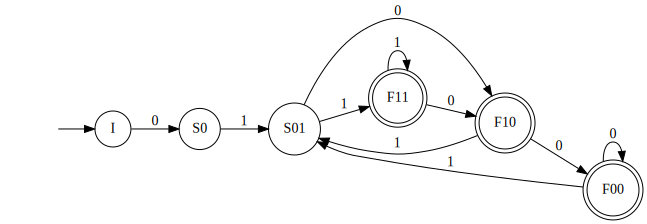

In [10]:
# RUN THIS CODE CELL
dotObj_dfa(dfa01n01, FuseEdges=True)

In [11]:
help(min_dfa_brz)

Help on function min_dfa_brz in module jove.Def_NFA:

min_dfa_brz(D)
    Minimize a DFA as per Brzozowski's algorithm.



# Question 2b (2%): Minimize this DFA using Brzozowski's minimization, assigning it to mdfa01n01

* Your original DFA might have been minimal - but since you don't often know that, minimize it anyhow
* Assign the minimized result to mdfa01n01 for the sake of future problems
* You may use 

In [12]:
# RUN THIS CODE CELL
mdfa01n01 = min_dfa_brz(dfa01n01)

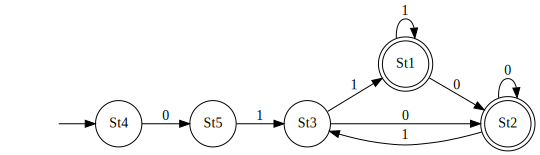

In [13]:
# RUN THIS CODE CELL
dotObj_dfa(mdfa01n01, FuseEdges=True)

# Question 2c (5%): Final check of your design

In [14]:
# RUN THIS CODE CELL
TestStrings = [nthnumeric(i, ['0','1']) for i in range(64)]
Laccepted = list(filter(lambda x: accepts_dfa(mdfa01n01, x), TestStrings))
Laccepted

['010',
 '011',
 '0100',
 '0110',
 '0111',
 '01000',
 '01010',
 '01011',
 '01100',
 '01110',
 '01111']

In [8]:
# RUN THIS CODE CELL
len(Laccepted)

11

# =================== QUESTION DIVIDING LINE ===================

# (40%) Question 3: The following NFA nfa01n01 is given by someone as having a language that is "interestingly related" to the language of mdfa01n01. Here are the possibilities.
  

## P1: The language of the DFA contained in that of the NFA (D is contained in N)

## P2: The language of the NFA contained in that of the DFA (N is contained in D)

## Your task is to determine whether 

### P1 and P2 are true, OR

### P1 is true, OR

### P2 is true

#### (We assure you these are the only outcomes possible)

## You must use nfa2dfa to obtain dfa_nfa01n01  (read it as "DFA of nfa01n01") in the work below.

### You must obtain the DFA D_minus_N which is the DFA that has all the strings in mdfa01n01 (D's language) but none in dfa_nfa01n01 (N's language). You may use DFA complementation and DFA intersection for this purpose. You can apply min_dfa whenever necessary. Then display  D_minus_N using dotObj_dfa. 

###  Similarly, obtain the DFA N_minus_D which is the DFA that has all the strings in dfa_nfa01n01 but none in mdfa01n01 and display it. 


### Then tell us whether P1 and P2 are true, or whether P1 alone is true, or P2 alone is true

## OK let's get to work now

# The given NFA -- DO NOT MODIFY THIS NFA !!!

In [15]:
nfa01n01 = md2mc(
'''NFA

I    : 0   -> S0
S0   : 1   -> S01

S01  : ''  -> A
A    : 0|1 -> A
A    : 0   -> F0
F0   : 0   -> F00

S01  : ''  -> B
B    : 1   -> B
B    : 1   -> F1

F1   : 0   -> F10
F1   : 1   -> F11

''')

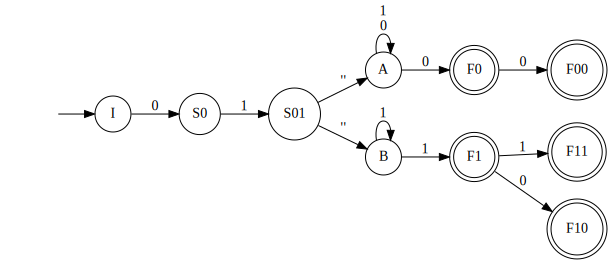

In [16]:
dotObj_nfa(nfa01n01, FuseEdges=True)

## Do the nfa2dfa conversion and obtain dfa_nfa01n01

In [17]:
dfa_nfa01n01 = min_dfa(nfa2dfa(nfa01n01))

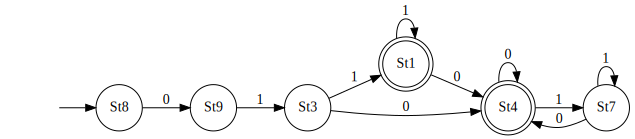

In [18]:
dotObj_dfa(dfa_nfa01n01, FuseEdges=True)

## Minimize to obtain mdfa01n01

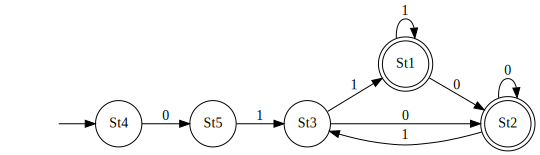

In [20]:
dotObj_dfa(mdfa01n01, FuseEdges=True)

# Question 3a (10%): Below, show your ability to obtain N_minus_D via DFA operations, and seeing your results in a nice minimal form clearly

In [25]:
N_minus_D = min_dfa(intersect_dfa(min_dfa(dfa_nfa01n01), min_dfa(comp_dfa(mdfa01n01))))

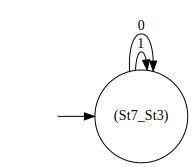

In [26]:
dotObj_dfa(N_minus_D)

# Question 3b (10%): Show your ability to obtain D_minus_N via DFA operations and seeing the results in a minimal form clearly

In [29]:
D_minus_N = min_dfa( intersect_dfa(min_dfa(mdfa01n01), min_dfa(comp_dfa(dfa_nfa01n01))) )

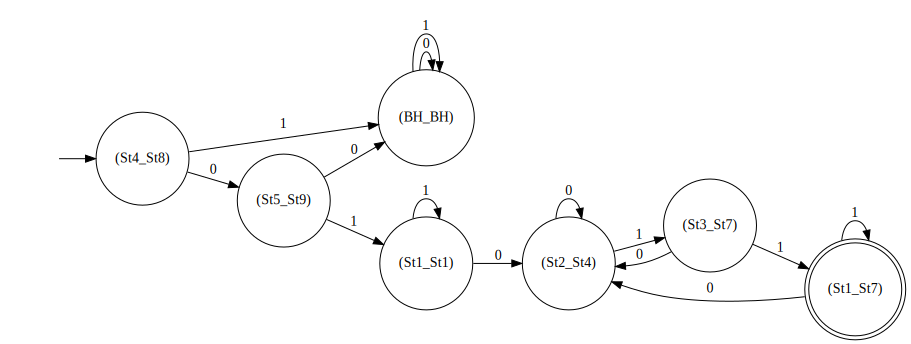

In [30]:
dotObj_dfa(D_minus_N)

# Question 3c (10%): Final answer for Question 2 with explanations saying which subtraction is non-empty,  and how you arrive at this conclusion

<font size="3">

*  When looking at both of the subtractions and the DFA that are created, the DFA that is empty (phrased another way, the DFA that does not accept any strings) because no string satisfies its requirements, is the N_minus_D DFA, and the subtraction that is non-empty is D_minus_N. There is one major reason for why that DFA N_minus_D is empty and why D_minus_N is not.  When looking at the original DFA in more detail, the mdfa01n01 (DFA D) accepts strings like 01011, while the dfa_nfa01n01 (DFA N) does not accept these kinds of string.  This means that while the D DFA accepts all the same strings that N does, N does not accept all the same strings that D does, meaning the language of D is larger than N. When D is subtracted from N, there are no remaining strings that N accepts, which is why intersecting N with the complement of D gives an empty machine.  This explains why, when we subtract D from N, the resulting DFA has nothing in it, and why when we do the same the other way around, the resulting D_minus_N is not empty and there are strings that it accepts.  It's because those are the strings that D accepts that N doesn't, strings like 01011, which will be included in the intersection, leaving the result of the subtraction non-empty. 
    
</font>    



## Answer below , selecting one of these

## P1 alone is true because...

## P2 alone is true because ...

## Both are true because ...


**ANSWER HERE** 
* P2 alone is true because every string accepted by N is accepted by D, but every string accepted by D is not accepted by N, which means that the language of N is contained in D but the language of D is not contained in N.

# Question 3d (5%): Describe whichever (D_minus_N or N_minus_D) is non-empty as a mathematical language expression

In [32]:
'''
E = { 01(0,1)*11 }
    THE LANGUAGE EXPRESSION HERE USING Curly Braces .. the 
    Old-style Language definintion syntax as in Chapters 2 and 3
    Regular Expressions are not acceptable (for consistency of
    all answers, plus to make sure you know the difference)
'''

'\nE = { 01(0,1)*11 }\n    THE LANGUAGE EXPRESSION HERE USING Curly Braces .. the \n    Old-style Language definintion syntax as in Chapters 2 and 3\n    Regular Expressions are not acceptable (for consistency of\n    all answers, plus to make sure you know the difference)\n'

## Describe whichever (D_minus_N or N_minus_D) is non-empty in clear English steps

In other words, these strings are missed in the NFA method (and hence are present in D_minus_N)

* The simplest reason for why D_minus_N is non-empty is that the D DFA accepts strings beginning with '01' and ending in '11' while the N DFA (or the NFA) does not.
* Because when ever the NFA sees a string that begins with 01, and at some point in the rest of the string sees another 0, it transitions to a different final state, when it sees a 1 after a 0 it transitions to a different 'fail' state, and if it sees a 1 immediately after a 1, instead of transitioning to one of the final accepting states, it stays in that different fail state, and never accepts a string that begins with 01 and ends with 11 like it should because in this state it only transitions out to a final on a 0.
* Because of this, D_minus_N is non-empty because there are strings that D accepts that N should accept but doesn't, hence why the intersection between D and the complement of N is non-empty.

</font>    

# =================== QUESTION DIVIDING LINE ===================

# (25%) Question 4: Convert the NFA given below to a DFA manually using the NFA to DFA conversion ("subset construction") applied manually -- NOT using the Jove command to directly achieve the conversion. Then check your work as instructed below

<font size="3">

*  Show your work as you did in Assignment-3. In particular:
  - Name the sets of states obtained during subset construction using underscore-separated names
  - Sort the set contents first
  
    . E.g. {A,C,B} 
    
    . is presented as
    
    . A_B_C
    
  - In subset construction, the {} set is like BH and so when you get {} as the next set of states, in the 
    DFA name the state BH  and loop back every symbol from BH back to BH
    
  - when you have to name an initial state of the DFA, name it starting with "i_" or "if_" as the case may be
  
  - when you have to name a final state of the DFA, name it starting with "f_"
  
  - Thus if you obtain a state B_C_F, you'll name it as f_B_C_F to tell jove that this is final
  
  - If the starting state is I, then naming it i_I is un-necessary
  
  - You can name states modulo these suggestions. Small deviations are OK. E.g. if you got B_C_F and you decide to sort it as F_B_C then that is already an "F-state" and so another "f_" is not needed
  
 
    
* Verify using available Jove commands
* Check your work showing that your DFA obtained by hand is isomorphic to the DFA obtained mechanically using Jove commands
    
</font>    


## The given NFA is below

In [33]:
NFA_given = md2mc(
'''
NFA

I : 0   -> A
A : 1   -> B

B : ''  -> C 
B : ''  -> F

C : 1   -> C
F : 0|1 -> F



''')

# Question 4a (5%): Showing your work

* Subset construction proceeds as follows

* I has itself as E-closure

* I upon 0 goes to {A}, named as A
* I upon 1 goes to {} (BH) as it does not have a move defined for this symbol.
*
* A on a 0 goes to {}, or BH, as it doesn't have a move defined for this symbol.
* A on a 1 goes to {B, C, F}, named as f_B_C_F
*
* f_B_C_F on a 0 gives {F}, named as F
* f_B_C_F on a 1 gives {C, F}, named as f_C_F
*
* F on a 0 or 1 gives {F}, which will remain as F
*
* f_C_F on a 0 gives {F}, which will be F
* f_C_F on a 1 gives {C, F}, which will be f_C_F
*
* BH is the black hole state so on either 0 or 1 it goes to itself.

# Question 4b (10%) : Presenting your DFA

In [59]:
DFA_hand = md2mc(
'''

DFA

I : 0 -> A
I : 1 -> BH

A : 0 -> BH
A : 1 -> f_B_C_F

f_B_C_F : 0 -> F
f_B_C_F : 1 -> f_C_F

F : 0 | 1 -> F

f_C_F : 0 -> F
f_C_F : 1 -> f_C_F

BH : 0 | 1 -> BH

''')

In [60]:
min_DFA_hand = min_dfa(DFA_hand)

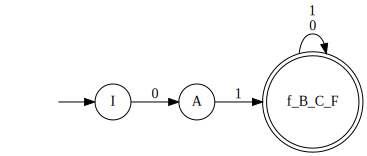

In [61]:
dotObj_dfa(min_DFA_hand, FuseEdges=True)

In [62]:
min_DFA_jove = min_dfa(nfa2dfa(NFA_given))

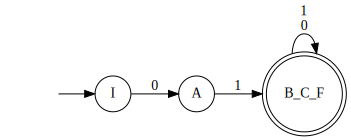

In [63]:
dotObj_dfa(min_DFA_jove, FuseEdges=True)

# Question 4c (10%) : Check that the hand-conversion and automated conversion agree

In [64]:
iso_dfa(min_DFA_hand, min_DFA_jove)

True

## Your conclusion based on the result of the iso_dfa check must be noted below

"Based on the result of the call to iso_dfa to compare the minimized forms of DFA_hand and DFA_jove to see if they are indeed isomorphic, they in fact are as the function returned True."

# END
